In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Order                                                       11746 non-null  int64         
 1   Property Id                                                 11746 non-null  int64         
 2   Property Name                                               11746 non-null  object        
 3   Parent Property Id                                          11746 non-null  object        
 4   Parent Property Name                                        11746 non-null  object        
 5   BBL - 10 digits                                             11735 non-null  object        
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object        
 7   NYC Building Identific

In [7]:
import pandas as pd
import numpy as np

# 1. تحويل "Not Available" إلى NaN
data = data.replace({'Not Available': np.nan})

# 2. التحقق من الأعمدة الرقمية
numeric_keywords = ['ft²', 'kWh', 'kBtu', 'therms', 'Metric Tons CO2e', 'gal', 'Score']
numeric_columns = [col for col in data.columns if any(k in col for k in numeric_keywords)]

# 3. تجربة التحويل بشكل آمن، بدون حذف أي صفوف
for col in numeric_columns:
    # إزالة الفواصل وإجبار القيم غير القابلة للتحويل على NaN
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')

# 4. التحقق من عدد الصفوف بعد التحويل
print("عدد الصفوف بعد التحويل:", len(data))

# 5. ملء NaN بطريقة مناسبة (مثلاً 0 أو المتوسط حسب العمود)
for col in numeric_columns:
    data[col] = data[col].fillna(0)

# 6. تحويل العمود الزمني Release Date
if 'Release Date' in data.columns:
    data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce', infer_datetime_format=True)

print("تم التحويل بنجاح. عدد الصفوف الآن:", len(data))


عدد الصفوف بعد التحويل: 11746
تم التحويل بنجاح. عدد الصفوف الآن: 11746


C:\Users\ibrahim1\AppData\Local\Temp\ipykernel_2320\747101495.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce', infer_datetime_format=True)


In [8]:
# عدد الصفوف الإجمالي
print("عدد الصفوف الكلي:", len(data))

# عدد الصفوف التي تحتوي على أي NaN
print("عدد الصفوف التي تحتوي على NaN:", data.isna().any(axis=1).sum())

# عدد القيم المفقودة في كل عمود
print("عدد القيم المفقودة لكل عمود:")
print(data.isna().sum())

# عرض أنواع الأعمدة للتأكد من التحويلات
print("أنواع الأعمدة بعد التحويل:")
print(data.dtypes)


عدد الصفوف الكلي: 11746
عدد الصفوف التي تحتوي على NaN: 11721
عدد القيم المفقودة لكل عمود:
Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                   

In [9]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. الأعمدة الرقمية المهمة
# -----------------------------
numeric_keywords = ['ft²', 'kWh', 'kBtu', 'therms', 'Metric Tons CO2e', 'gal', 'Score']
numeric_columns = [col for col in data.columns if any(k in col for k in numeric_keywords)]

# -----------------------------
# 2. التعامل مع القيم المفقودة
# -----------------------------
# استبدال 'Not Available' بـ NaN (إذا لم يتم سابقًا)
data = data.replace({'Not Available': np.nan})

# يمكن ملء NaN بالصفر أو المتوسط حسب طبيعة العمود
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')
    # خيار 1: ملء القيم المفقودة بالمتوسط
    data[col] = data[col].fillna(data[col].mean())

# -----------------------------
# 3. التعامل مع القيم المتطرفة (Outliers)
# -----------------------------
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # قص القيم خارج الحدود لتقليل تأثيرها على الرسم والتحليل
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# -----------------------------
# 4. التحقق من النتائج
# -----------------------------
print("عدد القيم المفقودة بعد المعالجة:")
print(data[numeric_columns].isna().sum())

print("\nملخص إحصائي بعد التعامل مع Outliers:")
print(data[numeric_columns].describe())


عدد القيم المفقودة بعد المعالجة:
Largest Property Use Type - Gross Floor Area (ft²)            0
2nd Largest Property Use - Gross Floor Area (ft²)             0
3rd Largest Property Use Type - Gross Floor Area (ft²)        0
ENERGY STAR Score                                             0
Site EUI (kBtu/ft²)                                           0
Weather Normalized Site EUI (kBtu/ft²)                        0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0
Weather Normalized Source EUI (kBtu/ft²)                      0
Fuel Oil #1 Use (kBtu)                                        0
Fuel Oil #2 Use (kBtu)                                        0
Fuel Oil #4 Use (kBtu)                                        0
Fuel Oil #5 & 6 Use (kBtu)                                    0
Diesel #2 Use (kBtu)                                          0
District Steam Use (kBtu)                                     0
Natural

In [10]:
import pandas as pd
import numpy as np

# -----------------------------
# 1️⃣ الأعمدة الرقمية المهمة
# -----------------------------
numeric_keywords = ['ft²', 'kWh', 'kBtu', 'therms', 'Metric Tons CO2e', 'gal', 'Score']
numeric_columns = [col for col in data.columns if any(k in col for k in numeric_keywords)]

# -----------------------------
# 2️⃣ التعامل مع القيم المفقودة في الأعمدة الرقمية
# -----------------------------
data = data.replace({'Not Available': np.nan})
for col in numeric_columns:
    # تحويل إلى float وإزالة أي فواصل
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')
    # ملء القيم المفقودة بالمتوسط
    data[col] = data[col].fillna(data[col].mean())

# -----------------------------
# 3️⃣ التعامل مع القيم المتطرفة (Outliers)
# -----------------------------
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # قص القيم خارج الحدود
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# -----------------------------
# 4️⃣ الأعمدة الزمنية
# -----------------------------
if 'Release Date' in data.columns:
    data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')
    # ملء القيم الفارغة بالتاريخ المتوسط
    median_date = data['Release Date'].median()
    data['Release Date'] = data['Release Date'].fillna(median_date)

# -----------------------------
# 5️⃣ الأعمدة الجغرافية
# -----------------------------
geo_columns = ['Latitude', 'Longitude']
for col in geo_columns:
    if col in data.columns:
        # حذف الصفوف التي بها قيم مفقودة
        data = data.dropna(subset=[col])

# -----------------------------
# 6️⃣ الأعمدة النصية
# -----------------------------
text_columns = ['Property Name', 'Primary Property Type - Self Selected']
for col in text_columns:
    if col in data.columns:
        data[col] = data[col].fillna('Unknown')

# -----------------------------
# 7️⃣ التحقق النهائي
# -----------------------------
print("عدد القيم المفقودة بعد المعالجة:")
print(data[numeric_columns + geo_columns + text_columns + ['Release Date']].isna().sum())

print("\nملخص إحصائي للأعمدة الرقمية بعد التعامل مع Outliers:")
print(data[numeric_columns].describe())

print("\nتم تجهيز البيانات بالكامل للمرحلة الاستكشافية والرسومات.")


عدد القيم المفقودة بعد المعالجة:
Largest Property Use Type - Gross Floor Area (ft²)            0
2nd Largest Property Use - Gross Floor Area (ft²)             0
3rd Largest Property Use Type - Gross Floor Area (ft²)        0
ENERGY STAR Score                                             0
Site EUI (kBtu/ft²)                                           0
Weather Normalized Site EUI (kBtu/ft²)                        0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0
Weather Normalized Source EUI (kBtu/ft²)                      0
Fuel Oil #1 Use (kBtu)                                        0
Fuel Oil #2 Use (kBtu)                                        0
Fuel Oil #4 Use (kBtu)                                        0
Fuel Oil #5 & 6 Use (kBtu)                                    0
Diesel #2 Use (kBtu)                                          0
District Steam Use (kBtu)                                     0
Natural

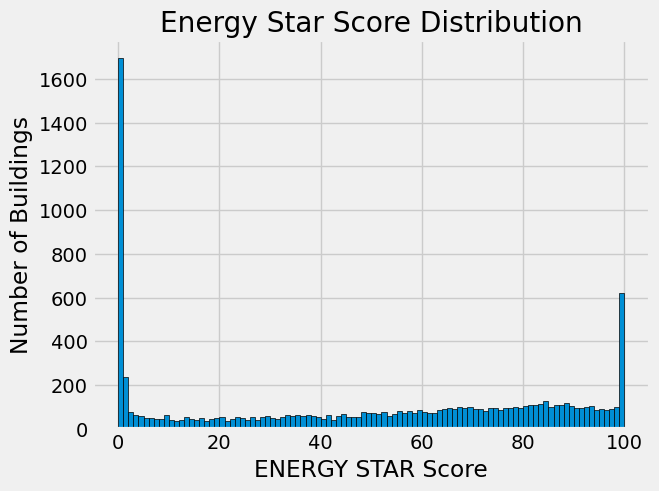

In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.hist(data['ENERGY STAR Score'].dropna(), bins=100, edgecolor='k')
plt.xlabel('ENERGY STAR Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')
plt.show()

C:\Users\ibrahim1\AppData\Local\Temp\ipykernel_2320\1808545811.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[score_col].dropna(),
C:\Users\ibrahim1\AppData\Local\Temp\ipykernel_2320\1808545811.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[score_col].dropna(),
C:\Users\ibrahim1\AppData\Local\Temp\ipykernel_2320\1808545811.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[score_col].dropna(),
C:\Users\ibrahim1\AppData\Local\Temp\ipykernel_2320\1808545811.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v

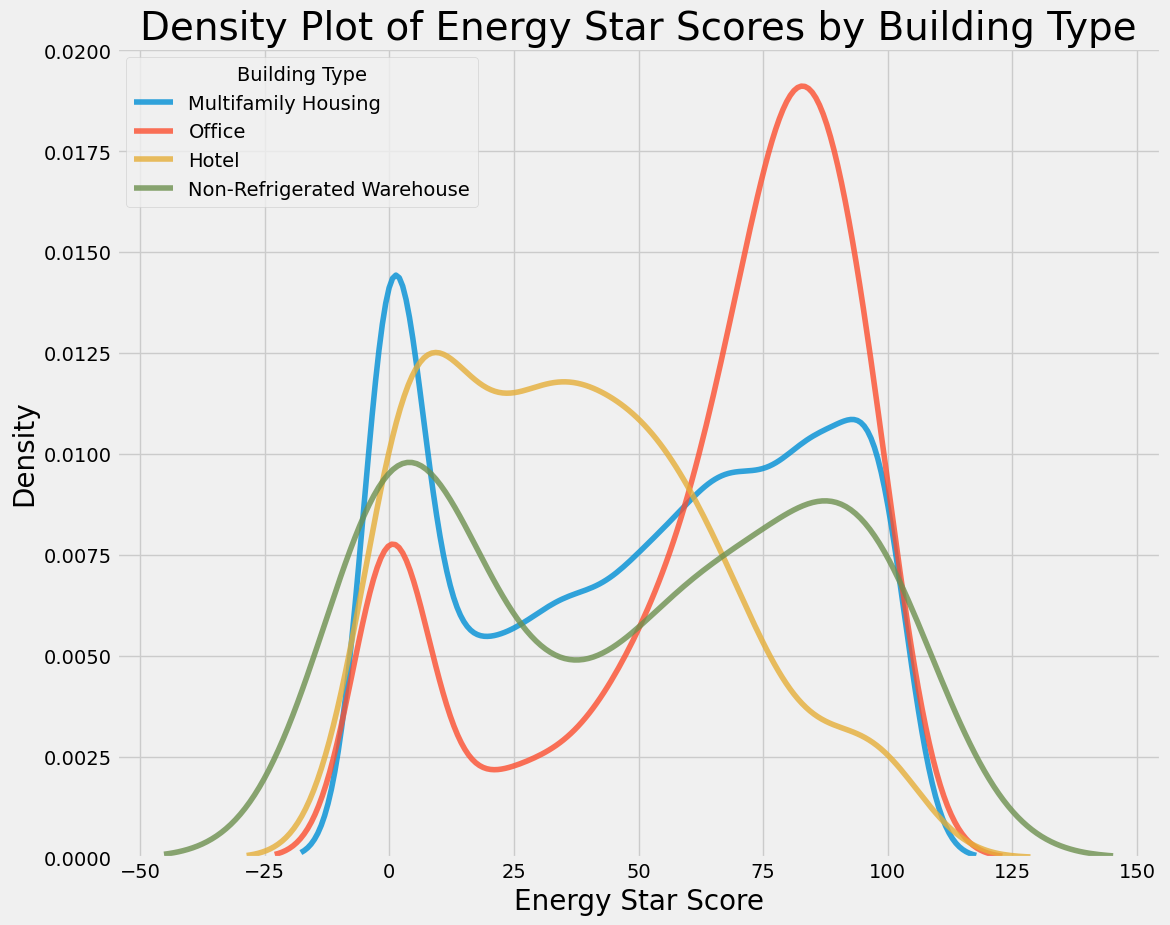

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# تصحيح أسماء الأعمدة
score_col = 'ENERGY STAR Score'
type_col = 'Largest Property Use Type'

# تصفية أنواع المباني التي لها أكثر من 100 بناء
types = data[type_col].value_counts()
types = list(types[types.values > 100].index)

plt.figure(figsize=(12, 10))

for b_type in types:
    subset = data[data[type_col] == b_type]
    sns.kdeplot(subset[score_col].dropna(),
                label=b_type, shade=False, alpha=0.8)

plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density Plot of Energy Star Scores by Building Type', size=28)
plt.legend(title='Building Type')
plt.show()


In [16]:
correlations_data = data[numeric_columns].corr()['ENERGY STAR Score'].sort_values()
print(correlations_data)

Site EUI (kBtu/ft²)                                          -0.420095
Source EUI (kBtu/ft²)                                        -0.414547
Weather Normalized Source EUI (kBtu/ft²)                     -0.336400
Weather Normalized Site EUI (kBtu/ft²)                       -0.333190
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.268801
Total GHG Emissions (Metric Tons CO2e)                       -0.214972
Indirect GHG Emissions (Metric Tons CO2e)                    -0.193697
Electricity Use - Grid Purchase (kBtu)                       -0.186475
Direct GHG Emissions (Metric Tons CO2e)                      -0.186104
Weather Normalized Site Electricity (kWh)                    -0.183699
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.175875
Natural Gas Use (kBtu)                                       -0.175648
Weather Normalized Site Natural Gas Use (therms)             -0.169470
2nd Largest Property Use - Gross Floor Area (ft²)            -0.163825
Proper

In [17]:
numeric_nonconstant = [col for col in numeric_columns if data[col].nunique() > 1]
correlations_data = data[numeric_nonconstant].corr()['ENERGY STAR Score'].sort_values()


In [20]:
import numpy as np

# إنشاء العمود اللوغاريتمي إذا لم يكن موجود
if 'log_Total GHG Emissions (Metric Tons CO2e)' not in data.columns:
    data['log_Total GHG Emissions (Metric Tons CO2e)'] = np.log1p(data['Total GHG Emissions (Metric Tons CO2e)'])

# استخدام الأسماء الصحيحة للأعمدة
plot_data = data[['ENERGY STAR Score', 
                  'Site EUI (kBtu/ft²)',
                  'Weather Normalized Source EUI (kBtu/ft²)',
                  'log_Total GHG Emissions (Metric Tons CO2e)']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan}).dropna()

plot_data = plot_data.rename(columns={
    'ENERGY STAR Score': 'Score',
    'Site EUI (kBtu/ft²)': 'Site EUI',
    'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
    'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'
})


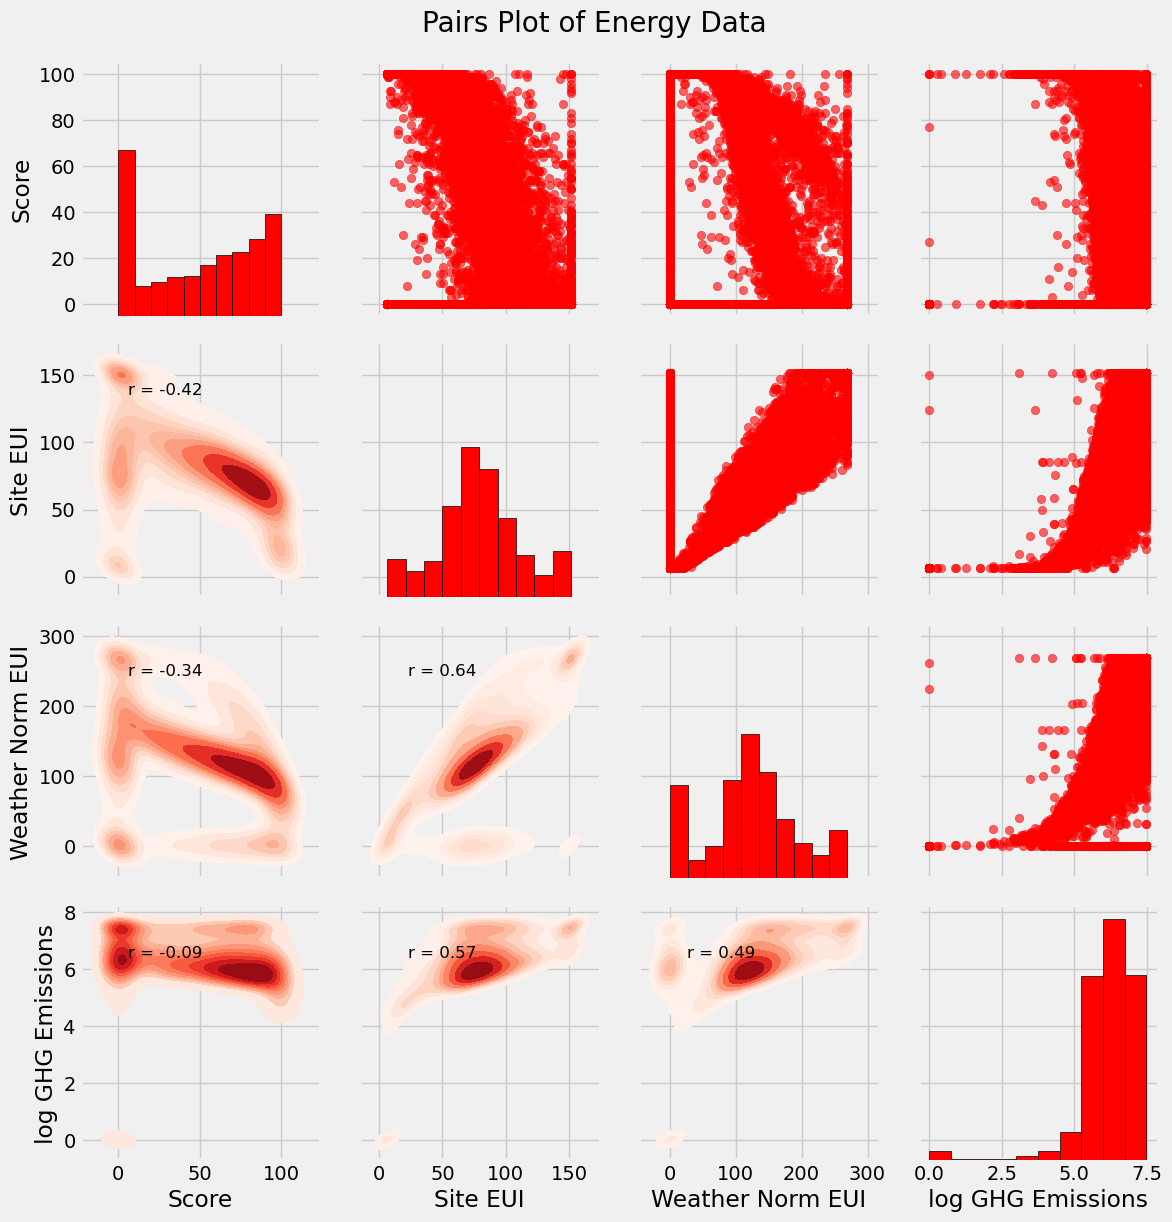

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# إنشاء العمود اللوغاريتمي إذا لم يكن موجود
if 'log_Total GHG Emissions (Metric Tons CO2e)' not in data.columns:
    data['log_Total GHG Emissions (Metric Tons CO2e)'] = np.log1p(data['Total GHG Emissions (Metric Tons CO2e)'])

# اختيار الأعمدة الصحيحة
plot_data = data[['ENERGY STAR Score', 
                  'Site EUI (kBtu/ft²)',
                  'Weather Normalized Source EUI (kBtu/ft²)',
                  'log_Total GHG Emissions (Metric Tons CO2e)']]

# استبدال القيم اللانهائية بـ NaN وحذفها
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan}).dropna()

# إعادة تسمية الأعمدة لتسهيل الرسم
plot_data = plot_data.rename(columns={
    'ENERGY STAR Score': 'Score',
    'Site EUI (kBtu/ft²)': 'Site EUI',
    'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
    'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'
})

# دالة عرض معامل الارتباط في المخطط
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(.2, .8), xycoords=ax.transAxes, size=12)

# إنشاء الـ PairGrid
grid = sns.PairGrid(data=plot_data, height=3)
grid.map_upper(plt.scatter, color='red', alpha=0.6)
grid.map_diag(plt.hist, color='red', edgecolor='black')
grid.map_lower(sns.kdeplot, cmap=plt.cm.Reds, fill=True)
grid.map_lower(corr_func)

plt.suptitle('Pairs Plot of Energy Data', size=20, y=1.02)
plt.show()


In [30]:
import pandas as pd
import numpy as np

# نسخ البيانات الأصلية
features = data.copy()

# -----------------------------
# 1️⃣ الأعمدة الرقمية واللوغاريتم
# -----------------------------
numeric_subset = data.select_dtypes('number').copy()
epsilon = 1e-6  # قيمة صغيرة لتجنب log(0)

for col in numeric_subset.columns:
    if col == 'ENERGY STAR Score':
       continue
    # استبدال القيم <=0 بـ NaN أو إضافة epsilon
    safe_values = numeric_subset[col].where(numeric_subset[col] > 0, epsilon)
    numeric_subset['log_' + col] = np.log(safe_values)

# -----------------------------
# 2️⃣ الأعمدة الفئوية
# -----------------------------
categorical_subset = data[['Borough', 'Largest Property Use Type']].copy()
categorical_subset = pd.get_dummies(categorical_subset, drop_first=True)

# -----------------------------
# 3️⃣ دمج البيانات الرقمية والفئوية
# -----------------------------
features = pd.concat([numeric_subset, categorical_subset], axis=1)

# -----------------------------
# 4️⃣ التحقق من النتائج
# -----------------------------
print("أول 5 صفوف من مجموعة الميزات الجديدة:")
print(features.head())

print("\nعدد القيم المفقودة في كل عمود:")
print(features.isna().sum())


أول 5 صفوف من مجموعة الميزات الجديدة:
   Order  Property Id  DOF Gross Floor Area  \
0      1        13286              289356.0   
1      2        28400             3693539.0   
2      3      4778226              152765.0   
3      4      4778267              891040.0   
4      5      4778288              211400.0   

   Largest Property Use Type - Gross Floor Area (ft²)  \
0                                           285316.5    
1                                           285316.5    
2                                           231342.0    
3                                           285316.5    
4                                           179694.0    

   2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   


In [31]:
features  = features.dropna(axis=1, how = 'all')
print(features.shape)

(9483, 128)


In [32]:
# حدد العمود الهدف بالاسم الصحيح
target_column = 'ENERGY STAR Score'

# فصل العمود الهدف
targets = data[target_column]

# إزالة العمود الهدف من الميزات
X = features.drop(columns=[target_column], errors='ignore')  # errors='ignore' لتجنب أي خطأ

# تقسيم البيانات
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.3, random_state=42)

# التحقق من الأشكال
print("شكل X_train:", X_train.shape)
print("شكل y_train:", y_train.shape)
print("شكل X_test:", X_test.shape)
print("شكل y_test:", y_test.shape)


شكل X_train: (6638, 127)
شكل y_train: (6638,)
شكل X_test: (2845, 127)
شكل y_test: (2845,)


In [34]:
import numpy as np

# تعريف دالة MAE
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# التخمين الأساسي: القيمة الوسيطية للعمود الهدف في التدريب
baseline_guess = np.median(y_train)

# عرض النتائج
print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))


The baseline guess is a score of 54.00
Baseline Performance on the test set: MAE = 31.6478


In [35]:
import pandas as pd
import numpy as np

# تحميل بيانات التدريب والاختبار
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# التحقق من حجم البيانات
print("Training Feature Size: ", train_features.shape)
print("Testing Feature Size: ", test_features.shape)
print("Training Labels Size: ", train_labels.shape)
print("Testing Labels Size: ", test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:  (2839, 64)
Training Labels Size:  (6622, 1)
Testing Labels Size:  (2839, 1)


In [37]:
from sklearn.impute import SimpleImputer

# إنشاء الـ imputer مع استراتيجية الوسيط
imputer = SimpleImputer(strategy='median')

# تعلم الإحصاءات من بيانات التدريب
imputer.fit(train_features)

# تحويل بيانات التدريب والاختبار
X_train = imputer.transform(train_features)
X_test = imputer.transform(test_features)
print(X_train[:5])  # أول 5 صفوف بعد ملء القيم المفقودة
print(X_test[:5])   # أول 5 صفوف من بيانات الاختبار بعد المعالجة

[[ 1.32760000e+04  5.84978400e+06  9.03000000e+04  1.95000000e+03
   1.00000000e+00  1.00000000e+02  1.26000000e+02  5.20000000e+00
   1.20000000e+00  9.94100000e+01  4.07592060e+01 -7.39624740e+01
   7.00000000e+00  2.18000000e+02  6.08881809e+00  4.59925271e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

In [38]:
from sklearn.preprocessing import MinMaxScaler

# إنشاء الـ scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# تعلم النطاقات من بيانات التدريب فقط
scaler.fit(X_train)

# تحويل بيانات التدريب والاختبار
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# التحقق من الشكل
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (6622, 64)
X_test_scaled shape: (2839, 64)


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)          # fit على بيانات التدريب فقط
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

# تحميل البيانات
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# استخراج العمود الهدف
y_train = train_labels['score'].values
y_test = test_labels['score'].values

# معالجة القيم المفقودة بالوسيط
imputer = SimpleImputer(strategy='median')
imputer.fit(train_features)
X_train = imputer.transform(train_features)
X_test = imputer.transform(test_features)

# تطبيع البيانات بين 0 و 1
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب نموذج Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train_scaled, y_train)

# التنبؤ وتقييم الأداء
predictions = gb.predict(X_test_scaled)
mae = np.mean(abs(predictions - y_test))
print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)


Gradient Boosted Performance on the test set: MAE = 10.0141


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# شبكة المعلمات المصححة
loss = ['squared_error', 'absolute_error', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8]
min_samples_split = [2, 4, 6, 10]
max_features = ['sqrt', 'log2', None]

hyperparameter_grid = {
    'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}

# نموذج
model = GradientBoostingRegressor(random_state=42)

# RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparameter_grid,
    cv=4,
    n_iter=25,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1,
    return_train_score=True,
    random_state=42
)

# تدريب
random_cv.fit(X_train_scaled, y_train)

# أفضل نموذج وأداءه
print("أفضل معلمات:", random_cv.best_params_)
print("أفضل MAE:", -random_cv.best_score_)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
أفضل معلمات: {'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 5, 'loss': 'absolute_error'}
أفضل MAE: 8.952927232417228


In [48]:
random_cv.best_estimator_
GradientBoostingRegressor(loss='lad', max_depth=5,max_features=None,min_samples_leaf=6,min_samples_split=6,n_estimators=500)

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=500)

In [57]:
%%timeit -n 1 -r 5
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor

# إنشاء إمبيوتر لاستبدال القيم المفقودة بالمتوسط
imputer = SimpleImputer(strategy='mean')

# تطبيق على بيانات التدريب والاختبار
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# إنشاء النموذج النهائي باستخدام أفضل المعلمات
final_model = GradientBoostingRegressor(
    loss='absolute_error',
    max_depth=5,
    max_features=None,
    min_samples_leaf=8,
    min_samples_split=6,
    n_estimators=500,
    random_state=42
)

# قياس وقت التدريب

final_model.fit(X_train_imputed, y_train)


19.2 s ± 199 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


أهم 10 ميزات:
                                             feature  importance
0                                Site EUI (kBtu/ft²)    0.430740
1  Weather Normalized Site Electricity Intensity ...    0.141940
2      Largest Property Use Type_Multifamily Housing    0.066287
3                               DOF Gross Floor Area    0.055893
4                                        Property Id    0.053294
5        log_Direct GHG Emissions (Metric Tons CO2e)    0.038149
6                                              Order    0.037752
7                                         Year Built    0.032285
8                                           Latitude    0.023261
9                                          Longitude    0.022303


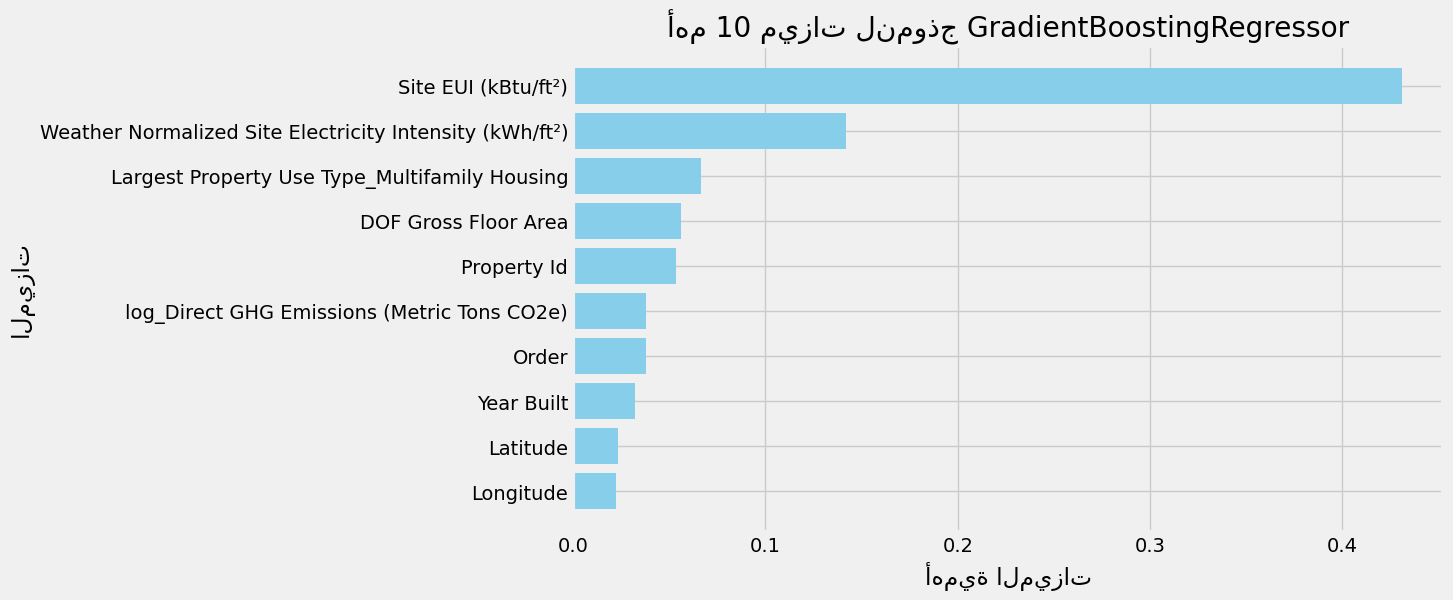

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor

# 1️⃣ معالجة القيم المفقودة
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# 2️⃣ إنشاء النموذج النهائي (خارج timeit)
final_model = GradientBoostingRegressor(
    loss='absolute_error',
    max_depth=5,
    max_features=None,
    min_samples_leaf=8,
    min_samples_split=6,
    n_estimators=500,
    random_state=42
)

# 3️⃣ تدريب النموذج
final_model.fit(X_train_imputed, y_train)

# 4️⃣ استخراج أهمية الميزات
importances = final_model.feature_importances_
feature_list = list(train_features.columns)

feature_results = pd.DataFrame({
    'feature': feature_list,
    'importance': importances
}).sort_values('importance', ascending=False).reset_index(drop=True)

print("أهم 10 ميزات:")
print(feature_results.head(10))

# 5️⃣ رسم أهم 10 ميزات
plt.figure(figsize=(10,6))
plt.barh(feature_results.head(10)['feature'][::-1], feature_results.head(10)['importance'][::-1], color='skyblue')
plt.xlabel("أهمية الميزات")
plt.ylabel("الميزات")
plt.title("أهم 10 ميزات لنموذج GradientBoostingRegressor")
plt.show()


In [66]:
from sklearn import tree
import os

# التأكد من أن مجلد images موجود
output_dir = "images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# اختيار شجرة واحدة من نموذج GradientBoostingRegressor المدرب
# [105][0] يعني الشجرة رقم 106 في المرحلة رقم 0
single_tree = final_model.estimators_[105][0]

# تصدير الشجرة إلى ملف .dot
dot_file_path = os.path.join(output_dir, "tree.dot")
tree.export_graphviz(
    single_tree,
    out_file=dot_file_path,
    feature_names=feature_list,
    filled=True,          # تلوين العقد
    rounded=True,         # العقد مستديرة الشكل
    special_characters=True
)

print(f"تم تصدير الشجرة بنجاح إلى '{dot_file_path}'.")


تم تصدير الشجرة بنجاح إلى 'images\tree.dot'.


In [67]:
!dot -Tpng images/tree.dot -o images/tree.png

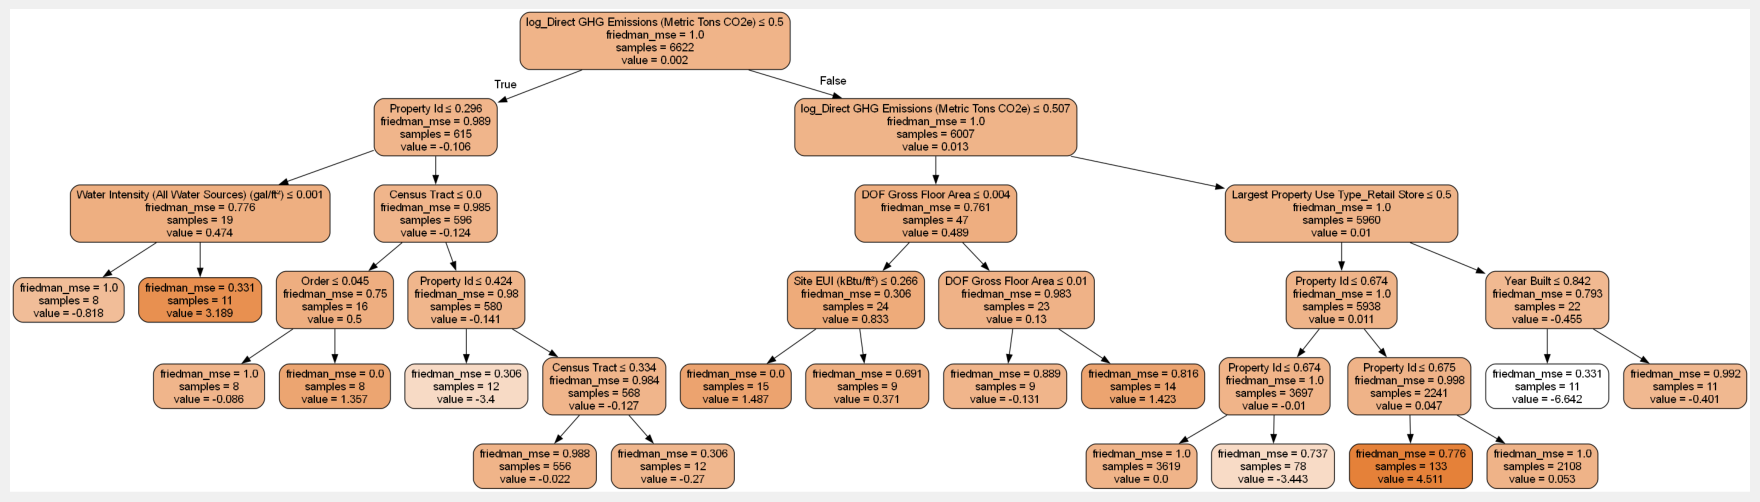

In [70]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# قراءة الصورة
img = mpimg.imread('images/tree.png')

# عرض الصورة
plt.figure(figsize=(20, 20))  # تكبير حجم الصورة لتكون واضحة
plt.imshow(img)
plt.axis('off')  # إزالة المحاور
plt.show()


In [71]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

# معالجة القيم المفقودة
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(X_test)

# إنشاء وتدريب النموذج
model = GradientBoostingRegressor(
    loss='absolute_error',  # LAD سابقًا
    max_depth=5,
    max_features=None,
    min_samples_leaf=6,
    min_samples_split=6,
    n_estimators=800,
    random_state=42
)
model.fit(X_train_imputed, y)

# التنبؤ على بيانات الاختبار
model_pred = model.predict(X_test_imputed)

# حساب القيم المطلقة للفروق
residuals = np.abs(model_pred - y_test)

# العثور على العينة ذات أكبر خطأ
idx_max = np.argmax(residuals)
wrong = X_test_imputed[idx_max, :]

# عرض النتائج
print('Prediction: %0.4f' % model_pred[idx_max])
print('Actual Value: %0.4f' % y_test[idx_max])
print('Index of max residual:', idx_max)


Prediction: 22.5035
Actual Value: 94.0000
Index of max residual: 2187


In [73]:
!pip install lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=6a0dda89b349f2b9a0f121b1bdd64fe691368546edef43ca75d7c062fdab2048
  Stored in directory: c:\users\ibrahim1\appdata\local\pip\cache\wheels\7c\04\5c\157dc9106512a6c7a30653ec064490c94a49e0fc8f63d19ab9
Successfully built lime


  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334


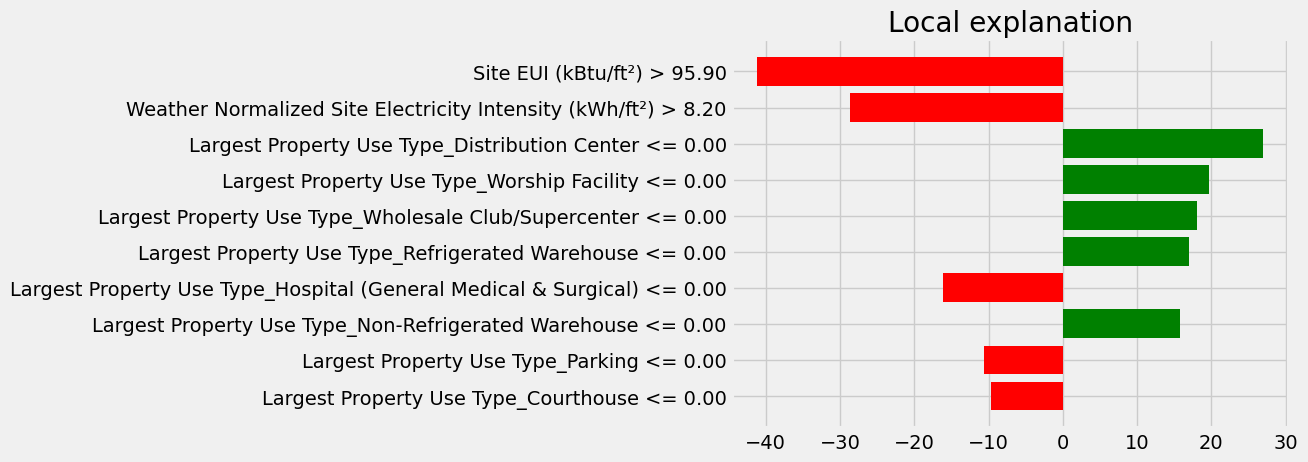

In [76]:
import numpy as np
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# التأكد من أن البيانات كلها أعداد وليس NaN
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
wrong_imputed = imputer.transform(wrong.reshape(1, -1))

# إنشاء explainer باستخدام البيانات الأصلية كاملة
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_imputed,
    training_labels=y,
    mode='regression',
    feature_names=feature_list
)

# شرح العينة ذات أكبر خطأ
exp = explainer.explain_instance(
    data_row=wrong_imputed[0],
    predict_fn=model.predict
)

# عرض الرسم في Jupyter
fig = exp.as_pyplot_figure()
plt.show()


In [77]:
exp.show_in_notebook()